Importing the packages

In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
var=pd.read_csv('variable_descriptions.csv')
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
y=train['target']

In [5]:
train = train.drop(['target','ward','ADM4_PCODE'],axis=1)
test = test.drop(['ward','ADM4_PCODE'],axis=1)

In [6]:
train['source'] ='train'
test['source'] ='test' # creating a new column to distinguish between train and test

data =pd.concat([train,test],ignore_index=True,sort=False)
print('train shape',train.shape)
print('test shape',test.shape)
print('data shape',data.shape)

train shape (2822, 61)
test shape (1013, 61)
data shape (3835, 61)


In [7]:
data['total_individuals'] = np.where(data['total_individuals'].between(45000,1000000), np.NaN, data['total_individuals'])
data['total_households'] = np.where(data['total_households'].between(25000,1000000), np.NaN, data['total_households'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_households   3833 non-null   float64
 1   total_individuals  3789 non-null   float64
 2   dw_00              3835 non-null   float64
 3   dw_01              3835 non-null   float64
 4   dw_02              3835 non-null   float64
 5   dw_03              3835 non-null   float64
 6   dw_04              3835 non-null   float64
 7   dw_05              3835 non-null   float64
 8   dw_06              3835 non-null   float64
 9   dw_07              3835 non-null   float64
 10  dw_08              3835 non-null   float64
 11  dw_09              3835 non-null   float64
 12  dw_10              3835 non-null   float64
 13  dw_11              3835 non-null   float64
 14  dw_12              3835 non-null   float64
 15  dw_13              3835 non-null   float64
 16  psa_00             3835 

In [12]:
data.columns

Index(['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13',
       'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00',
       'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07',
       'pw_08', 'lat', 'lon', 'NL', 'source'],
      dtype='object')

In [13]:
Taking a subset of the dataset
data[['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13',
       'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00',
       'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06', 'pw_07',
       'pw_08', 'NL', 'source']]

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,NL,source
0,1674.45058,5888.20750,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,0.0,0.0,0.292039,train
1,1736.99230,6735.33812,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,0.0,0.0,3.207775,train
2,2403.57591,7273.04995,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,0.0,0.0,0.000000,train
3,1740.78737,5734.49046,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,0.0,0.0,2.038778,train
4,1730.51451,6657.23835,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,0.0,0.0,0.000000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,0.000804,...,0.004045,0.000609,0.000392,0.000291,0.000148,0.002277,0.0,0.0,33.913055,test
3831,17470.24004,NaN,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,0.088044,...,0.346398,0.158056,0.030744,0.008313,0.000348,0.022417,0.0,0.0,60.009486,test
3832,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,0.099672,...,0.215139,0.035879,0.003850,0.000990,0.000352,0.010670,0.0,0.0,35.834860,test
3833,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,0.076050,...,0.022448,0.015737,0.000559,0.000000,0.000204,0.026741,0.0,0.0,50.153301,test


In [15]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

train.drop('source',axis=1,inplace=True)
test.drop('source',axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
X = train
test_new = test

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import catboost
from catboost import CatBoostRegressor
import lightgbm
from lightgbm import LGBMRegressor
seed = 2022 # seed
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor
scaler =  StandardScaler()
estimator = LGBMRegressor(n_estimators=1000, learning_rate=0.04, max_depth=6,random_state=seed,num_leaves=16)




pipe = Pipeline(steps=[
                       ('scaler',scaler),
                       ('model',estimator)])
kf = KFold(n_splits=10, shuffle=True, random_state=seed,) # for cross validation
scores = []
scores = []
preds= []



    

# creating a for loop for the k fold
i = 1
for train, test in kf.split(X, y):
    x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]# splitting the data
    # parameters for the algorithm this was done by manual tuning

    pipe.fit( x_train, y_train,)#model__use_best_model=True,model__eval_set=(x_test, y_test))
    # model__plot=True)# fitting on train data
    
    print('Number of splits trained {} '.format(i))
    score = sqrt(mean_squared_error(y_test, pipe.predict(x_test))) # checking the accuracy
    pred = pipe.predict(test_new)# making prediction
    scores.append(score)
    preds.append(pred)
    i += 1   

np.mean(scores)

Number of splits trained 1 
Number of splits trained 2 
Number of splits trained 3 
Number of splits trained 4 
Number of splits trained 5 
Number of splits trained 6 
Number of splits trained 7 
Number of splits trained 8 
Number of splits trained 9 
Number of splits trained 10 


3.2116117584602564

In [ ]:
##Plotting the predicted value result.

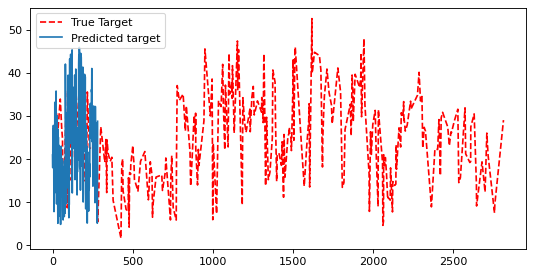

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test, 'r--', pipe.predict(x_test))
plt.legend(['True Target', 'Predicted target'], loc='upper left')
plt.title('Predicted Vs True Target')
plt.show()

In [34]:
predic=np.mean(preds,0)#Collecting the average value for the

In [35]:
ss = pd.read_csv('SampleSubmission.csv')

ss.target=predic
ss.to_csv('trail_lg.csv',index=False)